# Regresion Lineal

La idea consiste en obtener una ecuación de la forma 
$$
y = mx+b
$$
que mejor se ajusta a los datos que se tengan.

Tenemos que 
$$
m = \frac{\sum x \sum y - n\sum(xy)} {\left(\sum x\right)^2 - n\sum x^2}
$$
y
$$
b = \overline{y} - m\overline{x} 
$$
El coeficiente de correlación se calcula como
$$
R = \frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$
donde:
$$
\sigma_x = \sqrt{\frac{\sum\left(x^2\right)}{n} - \overline{x}^2},\quad
\sigma_y = \sqrt{\frac{\sum\left(y^2\right)}{n} - \overline{y}^2},\quad
$$
$$
\sigma_{xy} = \frac{\sum(xy)}{n} - \overline{x}\cdot\overline{y}
$$
(desviaciones tìpicas y covarianza, respectivamente)



# Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
         
1stFlrSF: First Floor square feet

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

LotFrontage: Linear feet of street connected to property

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
datos = np.load('proyecto_training_data.npy')
dfDatos = pd.DataFrame(datos)
dfDatos.columns = ['SalesPrice','OverallQuality','1stFlrSquareFeet','TotRmsAbvGrd','YearBuilt','LotFrontage']

In [3]:
dfDatos.head()

,SalesPrice,OverallQuality,1stFlrSquareFeet,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
#Verificamos si existen valore missing
missing_values_count = dfDatos.isnull().sum()
print(missing_values_count)

SalesPrice            0
OverallQuality        0
1stFlrSquareFeet      0
TotRmsAbvGrd          0
YearBuilt             0
LotFrontage         259
dtype: int64


In [5]:
#Imputacion de datos (para la columna de datos missing)
dfDatos['LotFrontage'] = dfDatos['LotFrontage'].fillna(dfDatos['LotFrontage'].mean())

In [6]:
#Verificamos si existen valores missing
missing_values_count = dfDatos.isnull().sum()
print(missing_values_count)

SalesPrice          0
OverallQuality      0
1stFlrSquareFeet    0
TotRmsAbvGrd        0
YearBuilt           0
LotFrontage         0
dtype: int64


# Selección (Datos de entrenamiento)

In [7]:
#Divide los datos en entrenamiento 80% y test 20%
dfTrain, dfTest = train_test_split(dfDatos, test_size=0.2)

#Información básica de dataframe 
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 684 to 775
Data columns (total 6 columns):
SalesPrice          1168 non-null float64
OverallQuality      1168 non-null float64
1stFlrSquareFeet    1168 non-null float64
TotRmsAbvGrd        1168 non-null float64
YearBuilt           1168 non-null float64
LotFrontage         1168 non-null float64
dtypes: float64(6)
memory usage: 63.9 KB


In [8]:
#Análisis exploratorio de datos
#obtenemos el nuemro de datos en cada field: numero de observaciones, media, desviacion estandar, minimo, maximo y sus cuartiles
dfTrain.describe()

,SalesPrice,OverallQuality,1stFlrSquareFeet,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,181972.275685,6.110445,1165.340753,6.535103,1971.059075,70.213563
std,81021.338453,1.386912,373.956287,1.590611,30.374313,21.369926
min,35311.000000,1.000000,372.000000,3.000000,1872.000000,21.000000
25%,130000.000000,5.000000,887.750000,5.000000,1954.000000,60.000000
50%,163950.000000,6.000000,1092.000000,6.000000,1972.000000,70.049958
75%,214600.000000,7.000000,1391.250000,7.000000,2000.000000,79.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


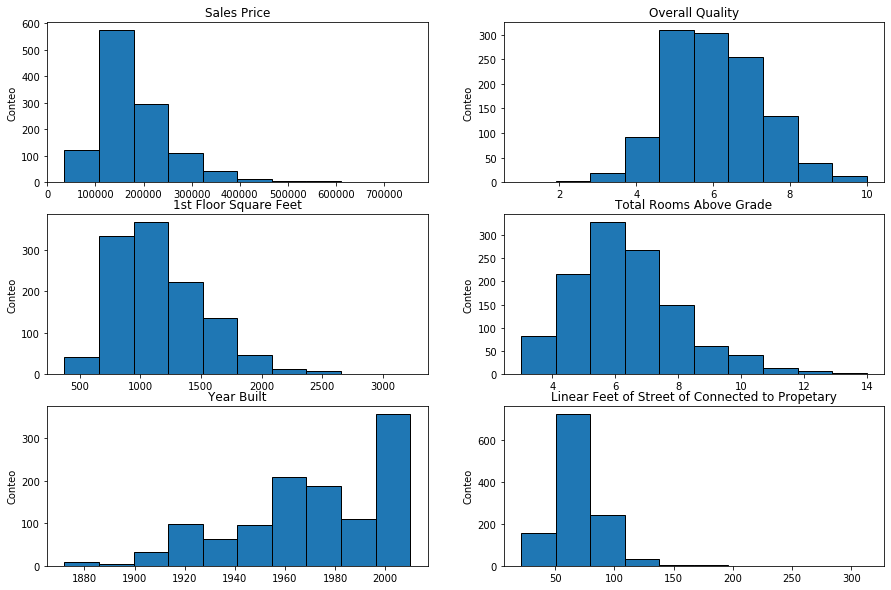

In [9]:
# Histograma (con matplotlib, distribuciones de datos mediante la utilización de histogramas)
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
plt.hist(dfTrain['SalesPrice'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('Sales Price')
plt.ylabel('Conteo')

plt.subplot(3,2,2)
plt.hist(dfTrain['OverallQuality'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('Overall Quality')
plt.ylabel('Conteo')

plt.subplot(3,2,3)
plt.hist(dfTrain['1stFlrSquareFeet'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('1st Floor Square Feet')
plt.ylabel('Conteo')

plt.subplot(3,2,4)
plt.hist(dfTrain['TotRmsAbvGrd'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('Total Rooms Above Grade')
plt.ylabel('Conteo')

plt.subplot(3,2,5)
plt.hist(dfTrain['YearBuilt'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('Year Built')
plt.ylabel('Conteo')

plt.subplot(3,2,6)
plt.hist(dfTrain['LotFrontage'],alpha=1, edgecolor = 'black',  linewidth=1)
plt.title('Linear Feet of Street of Connected to Propetary')
plt.ylabel('Conteo')
plt.show()

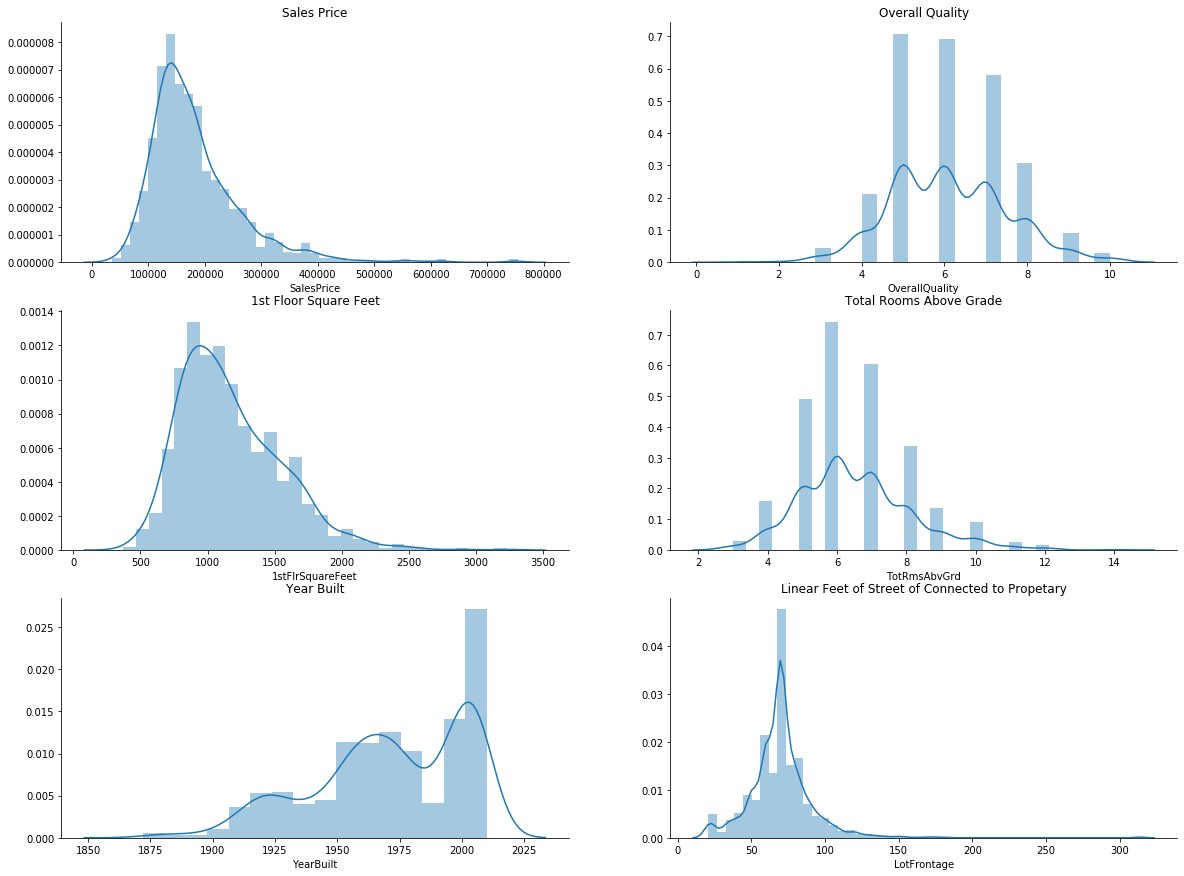

In [10]:
# Histograma (con seaborn, distribuciones de datos mediante la utilización de histogramas)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.distplot(dfTrain['SalesPrice'], ax=axes[0, 0]).set_title('Sales Price')
sns.distplot(dfTrain['OverallQuality'], ax=axes[0, 1]).set_title('Overall Quality')
sns.distplot(dfTrain['1stFlrSquareFeet'], ax=axes[1, 0]).set_title('1st Floor Square Feet')
sns.distplot(dfTrain['TotRmsAbvGrd'], ax=axes[1, 1]).set_title('Total Rooms Above Grade')
sns.distplot(dfTrain['YearBuilt'], ax=axes[2, 0]).set_title('Year Built')
sns.distplot(dfDatos['LotFrontage'], ax=axes[2, 1]).set_title('Linear Feet of Street of Connected to Propetary')
sns.despine(left=False)

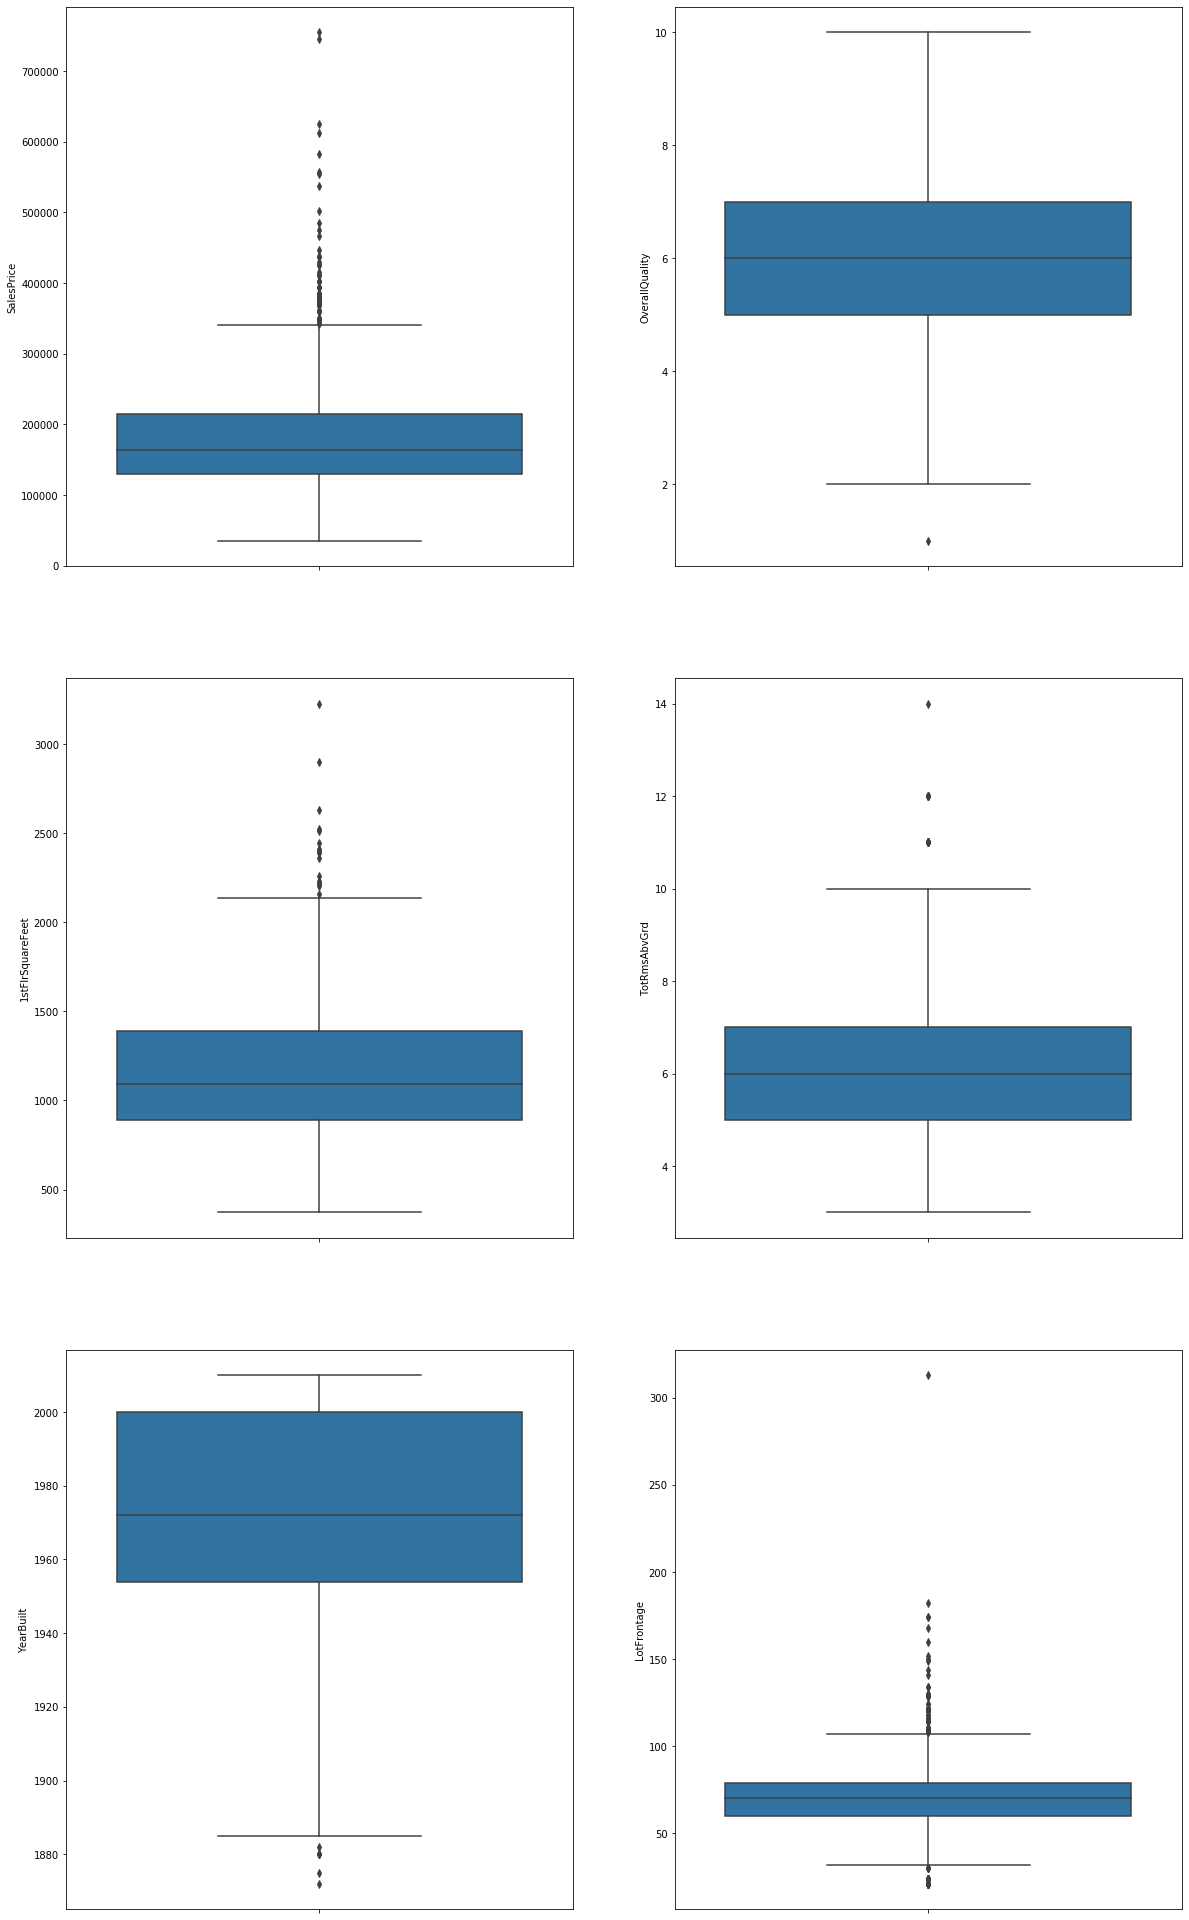

In [11]:
# Box Plot (verificar valores atipicos para cada uno de los datos en observacion)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(20, 35))

sns.boxplot(dfTrain.SalesPrice, orient="v", ax=axes[0,0])
sns.boxplot(dfTrain.OverallQuality, orient="v", ax=axes[0,1])
sns.boxplot(dfTrain['1stFlrSquareFeet'], orient="v", ax=axes[1,0])
sns.boxplot(dfTrain.TotRmsAbvGrd, orient="v", ax=axes[1,1])
sns.boxplot(dfTrain.YearBuilt, orient="v", ax=axes[2,0])
sns.boxplot(dfTrain.LotFrontage, orient="v", ax=axes[2,1])
plt.show()

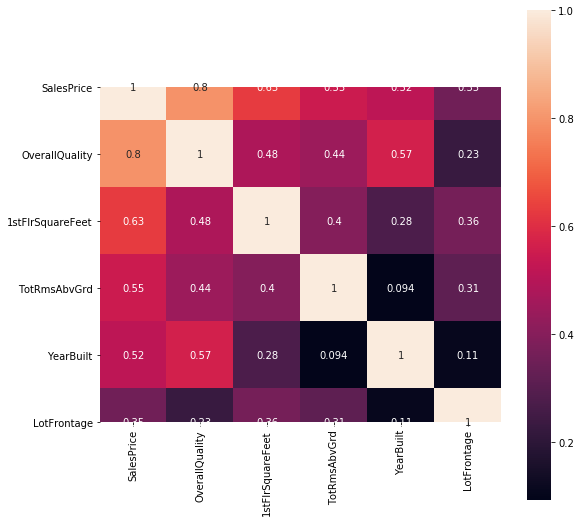

In [12]:
# Matriz de correlacion (verificar que var. tienen mayor correlacion para la elecion de las dos variables independientes)
plt.rcParams['figure.figsize'] = (9, 9)
sns.heatmap(dfTrain.corr(), annot = True,  square=True)
plt.show()

# Variables a utilizar para los dos modelos de predición 
Estas variables fueron escogidas de acuerdo a la gran correlacion para la prediccion del precio de las casas "SalesPrice" y son las siguientes: 
* **OverallQuality**
* **1stFlrSquareFeet**

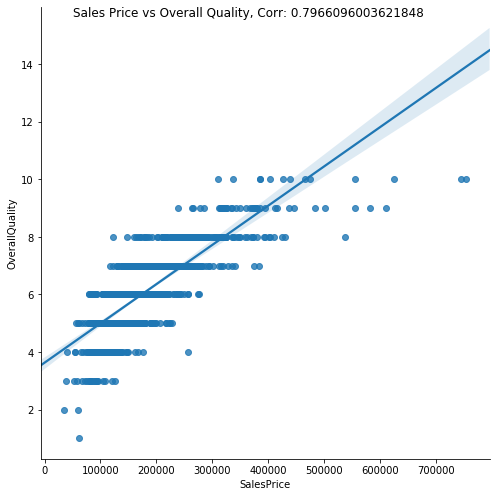

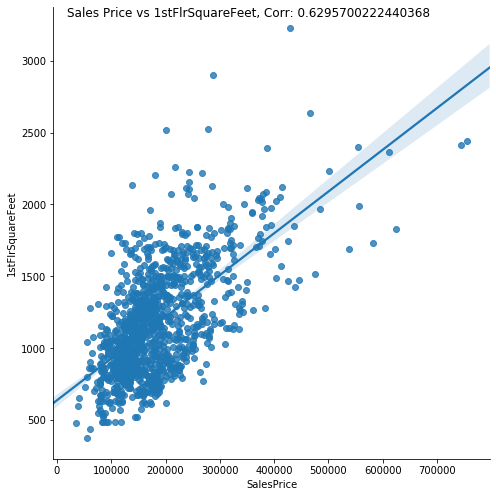

In [13]:
# Scatter Plot (Grafico de dispercion con seaborn) para las variables independientes seleccionadas de los modelos
sns.lmplot('SalesPrice', 'OverallQuality', data=dfTrain, height=7).fig.suptitle('Sales Price vs Overall Quality, Corr: ' + str(dfTrain['SalesPrice'].corr(dfTrain['OverallQuality'])))
sns.lmplot('SalesPrice', '1stFlrSquareFeet', data=dfTrain, height=7).fig.suptitle('Sales Price vs 1stFlrSquareFeet, Corr: ' + str(dfTrain['SalesPrice'].corr(dfTrain['1stFlrSquareFeet'])))
plt.show()

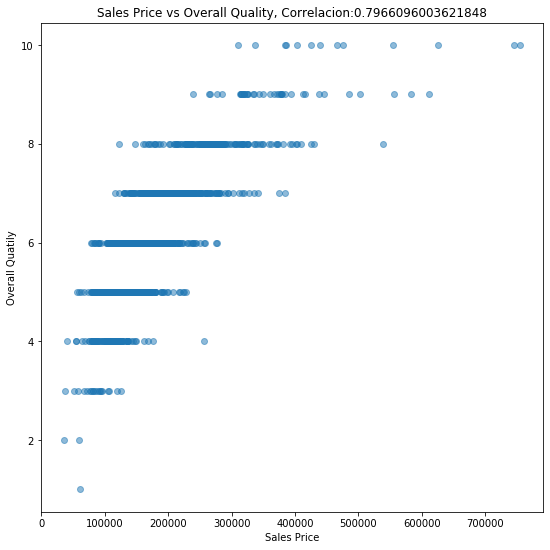

In [14]:
# Scatter Plot (Grafico de dispercion con matplotlib) para las variables independientes seleccionadas de los modelos
plt.scatter(dfTrain.SalesPrice, dfTrain.OverallQuality, alpha=0.5)
plt.title('Sales Price vs Overall Quality, Correlacion:' + str(dfTrain['SalesPrice'].corr(dfTrain['OverallQuality'])))
plt.xlabel('Sales Price')
plt.ylabel('Overall Quatily')
plt.show()

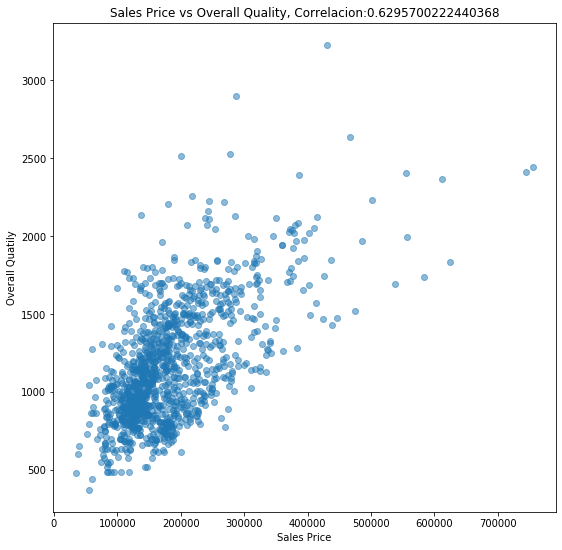

In [15]:
plt.scatter(dfTrain.SalesPrice, dfTrain['1stFlrSquareFeet'], alpha=0.5)
plt.title('Sales Price vs Overall Quality, Correlacion:' + str(dfTrain['SalesPrice'].corr(dfTrain['1stFlrSquareFeet'])))
plt.xlabel('Sales Price')
plt.ylabel('Overall Quatily')
plt.show()

#  Primer Modelo (Var. Independiente: OverallQuality)

In [ ]:
#Ecuacion Regresion Lineal Simple
# y = mx + b
# y = (Coefficients)(Var. Independiente) + (Intercepto)

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = dfTrain[['OverallQuality']]
X_train = np.array(dataX)
y_train = dfTrain['SalesPrice'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes "b_1" obtenidos, En nuestro caso, serán la Tangente, (a)
print('Coefficients: ', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0), (b)
print('Independent term: ', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0 - "Estadístico R_2"
print('Variance score: %.2f' % r2_score(y_train, y_pred))

In [ ]:
plt.scatter(dfTrain.OverallQuality, dfTrain.SalesPrice)
plt.plot(X_train,y_pred, color= 'red', linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('Overall Quality')
plt.ylabel('Valor Medio')
plt.show()

#  Segundo Modelo (variable independiente 1stFlrSquareFeet)

In [ ]:
#Ecuacion Regresion Lineal Simple
# y = mx + b
# y = (Coefficients)(Var. Independiente) + (Intercepto)

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = dfTrain[['1stFlrSquareFeet']]
X_train = np.array(dataX)
y_train = dfTrain['SalesPrice'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes "b_1" obtenidos, En nuestro caso, serán la Tangente, (a)
print('Coefficients: ', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0), (b)
print('Independent term: ', regr.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0 - "Estadístico R_2"
print('Variance score: %.2f' % r2_score(y_train, y_pred))

In [ ]:
plt.scatter(dfTrain['1stFlrSquareFeet'], dfTrain.SalesPrice)
plt.plot(X_train,y_pred, color= 'red', linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('Overall Quality')
plt.ylabel('Valor Medio')
plt.show()

# Modelo Regresion lineal (Manual)

In [16]:
# Funcion de entrenamiento manual para el modelo
def fnCalculoRegrecionLineal(prX,prY,prEpochs,prLr, prImprimirError):
    
    m = 0; b = 0; errorLs = [];betasDict = {}
    y = np.array(prY)
    matris_x = np.array([prX, np.ones_like(prX)], dtype = "float64")
    matris_xT = np.transpose(matris_x)
    prBetas = np.array([m,b], dtype = "float64")
    
    for i in range(0,prEpochs+1):
        yhat = np.dot(matris_xT, prBetas)
        error = 1/2* ( np.mean((yhat - y)**2))
        errorLs.append(error)
        gradientesBeta = (np.array(yhat-y, dtype = "float64")* matris_x).mean(1)
        prBetas = prBetas - (prLr*gradientesBeta)
        betasDict[i+1] = prBetas 
        if i%prImprimirError == 0:
            print("Epoch: ", i, "Error: ",error)
    return errorLs, betasDict

# Funcion que grafica el aprendizaje del modelo
def fnGraficaPerdida(prNombreVarIndependiente,prX, prY, prEpochs, prLr, prIntervalo):
    vX,vY = fnCalculoRegrecionLineal(prX,prY,prEpochs,prLr,prIntervalo)
    plt.plot(np.linspace(0,len(vY),len(vY)),vX)
    plt.title("Función de costo: " + str(prNombreVarIndependiente))
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()
    
#Funcion que grafica la desminucion del error cuadrado medianto el entrenamiento 
def fnGraficaEvolucionRegression(prX,prY,prDict, prN):
    varX = np.linspace(0,np.max(prX)+1,100)
    for i in range(0,len(prDict),prN):
        calculoX = prDict[i+1][0] * varX + prDict[i+1][1]
        plt.scatter(prX,prY)
        plt.plot(varX,calculoX, 'r')
        plt.title("Epoch: " + str(i))
        plt.xlabel(str(prX.name))
        plt.ylabel(str(prY.name))
        plt.show()

Epoch:  0 Error:  19836373074.03425
Epoch:  300000 Error:  1470868439.756542


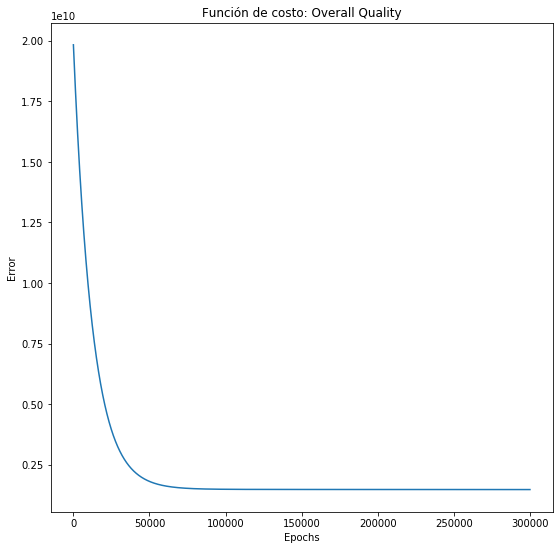

In [17]:
# Comportamiento de la funcion de costo para modelo de "regresion lineal" con (Overall Quality)
fnGraficaPerdida("Overall Quality",dfTrain['OverallQuality'], dfTrain['SalesPrice'], 300000, 0.000001, 300000)

Epoch:  0 Error:  19836373074.03425
Epoch:  40 Error:  2004304028.3053107


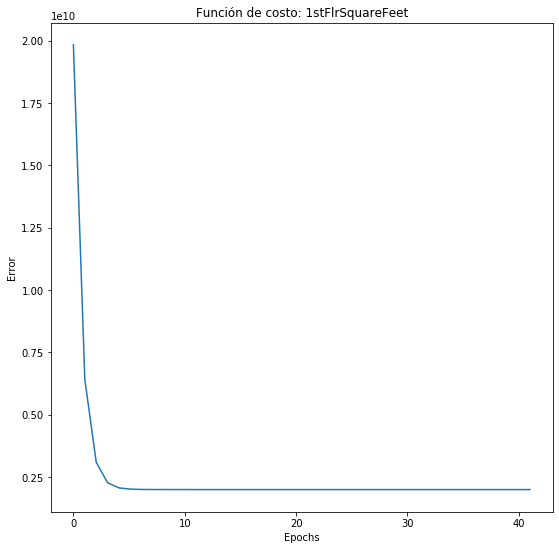

In [18]:
# Comportamiento de la funcion de costo para modelo de "regresion lineal" con (1stFlrSquareFeet)
fnGraficaPerdida("1stFlrSquareFeet",dfTrain['1stFlrSquareFeet'], dfTrain['SalesPrice'], 40, 0.000001, 40)

Epoch:  0 Error:  19836373074.03425
Epoch:  100000 Error:  1482030724.7497513
Epoch:  200000 Error:  1473487850.5773904
Epoch:  300000 Error:  1470868439.756542


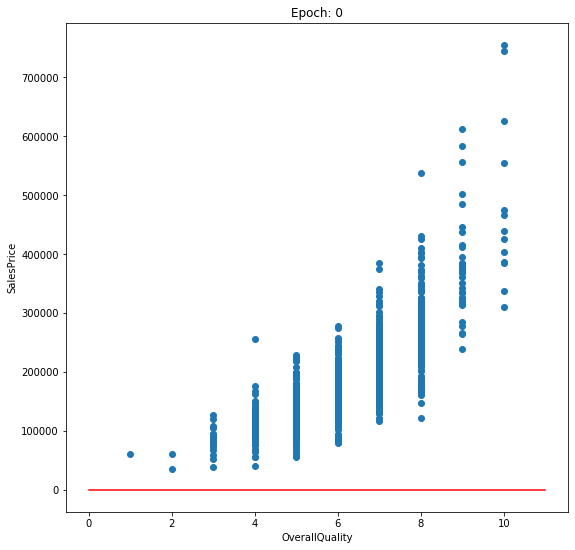

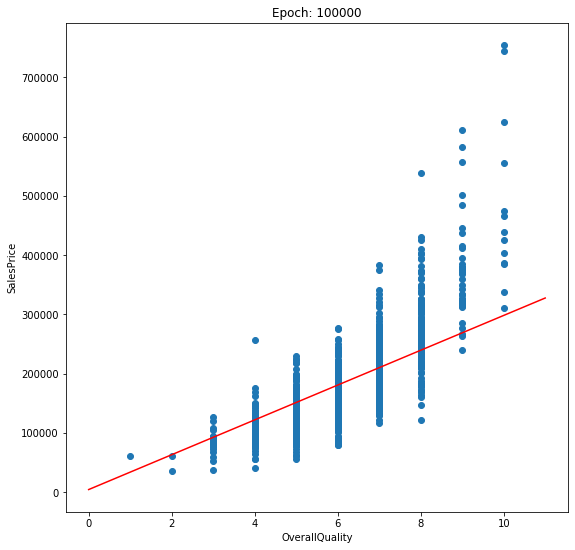

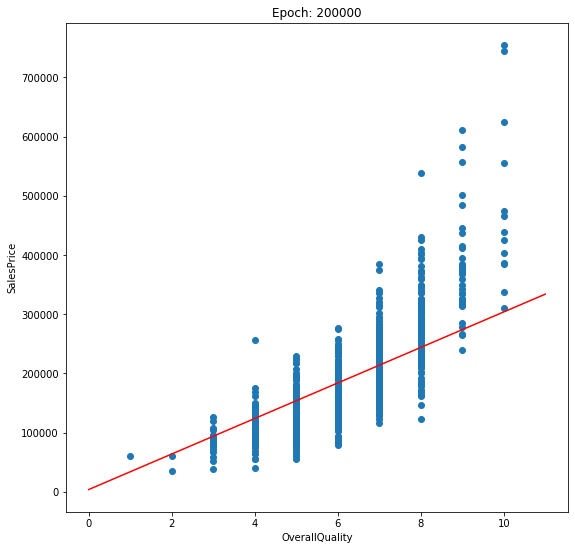

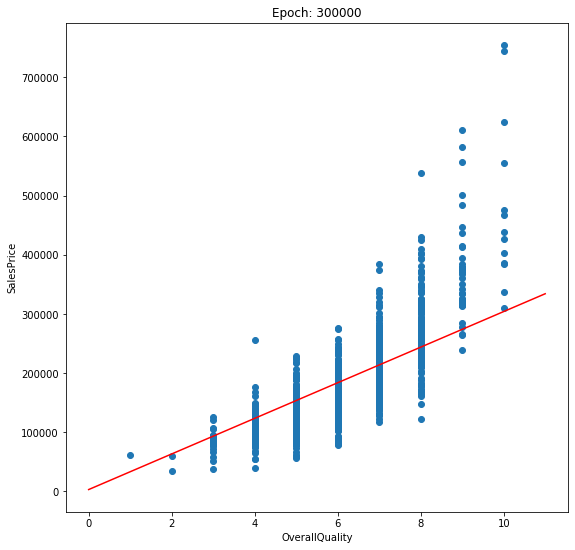

In [19]:
#Entrenamiento de modelo de regresion lineal de OverallQual vs SalePrice
xOverallQuality, yOverallQuality = fnCalculoRegrecionLineal(dfTrain['OverallQuality'], dfTrain['SalesPrice'], 300000, 0.000001, 100000)
#Grafica de regresion lineal en epocas de entrenamiento para modelo de OverallQual vs SalePrice
fnGraficaEvolucionRegression(dfTrain['OverallQuality'], dfTrain['SalesPrice'],yOverallQuality, 100000)

Epoch:  0 Error:  19836373074.03425
Epoch:  10 Error:  2004319701.7403793
Epoch:  20 Error:  2004304120.5286045
Epoch:  30 Error:  2004304074.410148
Epoch:  40 Error:  2004304028.3053107


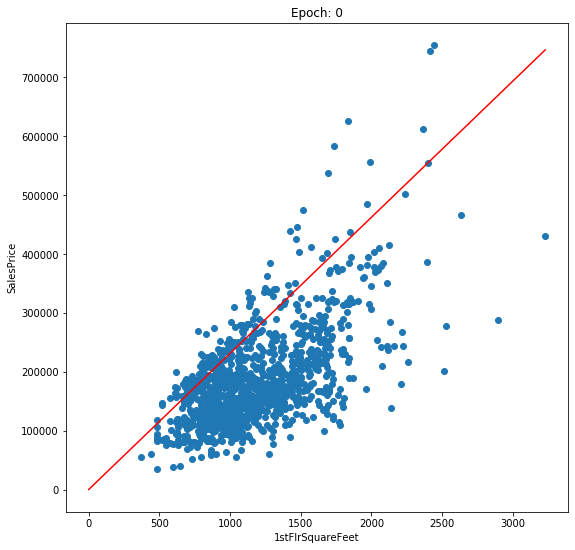

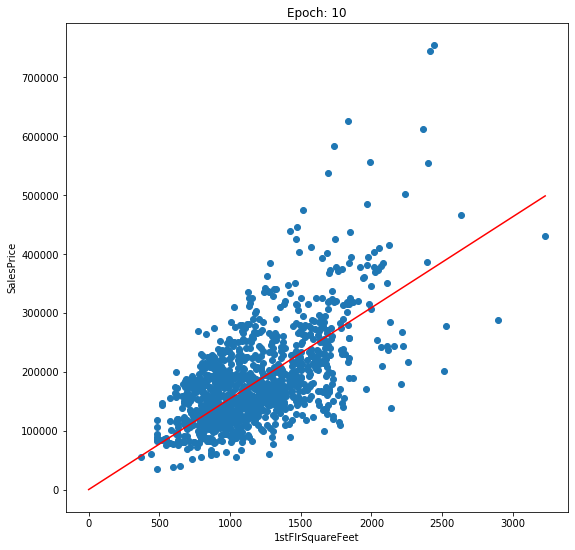

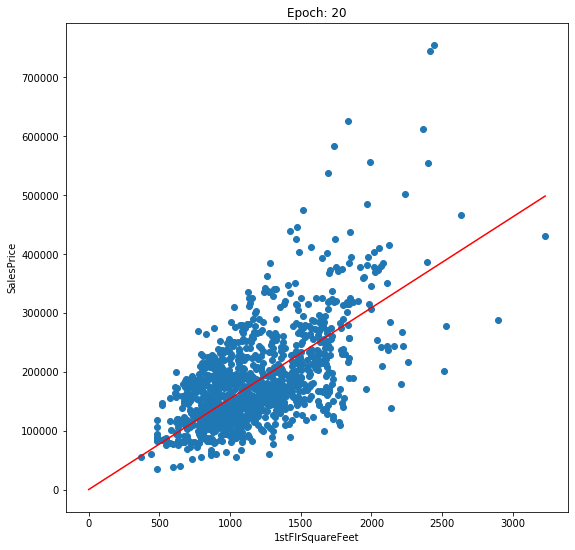

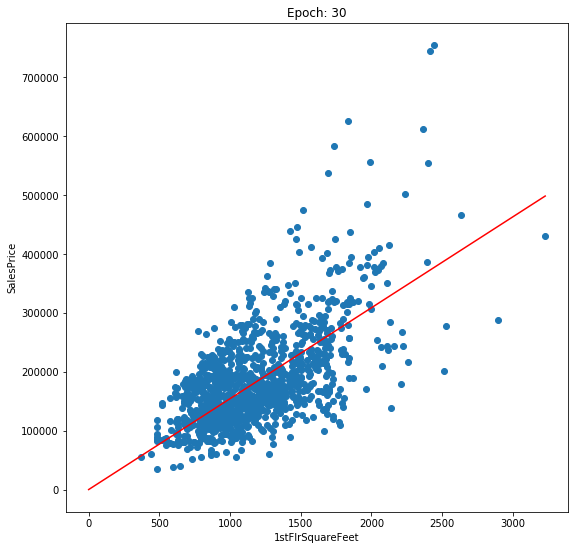

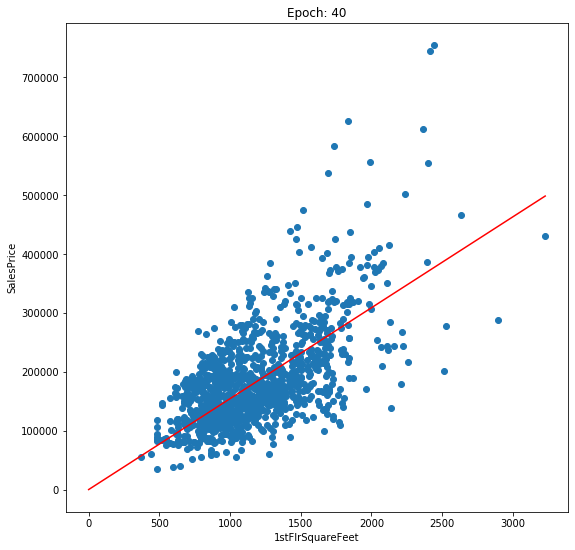

In [20]:
#Entrenamiento de modelo de regresion lineal de OverallQual vs SalePrice
x1stFlrSquareFeet, y1stFlrSquareFeet = fnCalculoRegrecionLineal(dfTrain['1stFlrSquareFeet'], dfTrain['SalesPrice'], 40, 0.000001, 10)
#Grafica de regresion lineal en epocas de entrenamiento para modelo de OverallQual vs SalePrice
fnGraficaEvolucionRegression(dfTrain['1stFlrSquareFeet'], dfTrain['SalesPrice'],y1stFlrSquareFeet, 10)

# Modelo Regresion lineal (sklearn)

In [34]:
#Entrenamiento de modelo de regresion lineal con sklearn
dataOverallQuality = dfTrain[['OverallQuality']]
data1stFlrSquareFeet = dfTrain[['1stFlrSquareFeet']]

X_OverallQuality = np.array(dataOverallQuality)
X_1stFlrSquareFeet = np.array(data1stFlrSquareFeet)
Y_SalesPrice = dfTrain['SalesPrice'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regrOverallQuality = regr.fit(X_OverallQuality, Y_SalesPrice)
regr1stFlrSquareFeet =regr.fit(X_1stFlrSquareFeet, Y_SalesPrice)

In [62]:
#Funcion para calcular las predicciones de ambos modelos
def fnPrediccionModelos(prSklearn, prManual, prx):
    yhatSklearn = prSklearn.predict(pd.DataFrame(prx))
    yhatSklearn = yhatSklearn.transpose()
    yhatSklearn = np.reshape(yhatSklearn, 292)
    yhatManual = np.array(prManual[len(prManual)][0] * prx + prManual[len(prManual)][1]) #y = mx + b
    yhatSumModelos = (yhatSklearn + yhatManual)
    
    return yhatSklearn, yhatManual, yhatSumModelos

#Funcion para calcular error
def fnCCalcularError(prYhat, prY):
    error = 1/2*(np.mean((prYhat - prY)**2))
    return error

def fnGraficaErrorModelosPrediccion(prErrorSK, PrErrorMN):
    #Comparacion del error de los modelos
    fig, ax = plt.subplots()
    width = 0.40
    axiX1 = np.arange(len(prErrorSK))
    axiX2 = [x + width for x in axiX1]
    bars1 = ax.bar(axiX1, prErrorSK, width, label='Scikit-Learn')
    bars2 = ax.bar(axiX2, PrErrorMN, width, label='Manual')
    ax.set_title('Error de modelos de Prediccion')
    ax.set_ylabel('Error')
    ax.set_xticks(axiX1+0.20)
    ax.set_xticklabels(('OverallQuality', '1stFlrSquareFeet'))
    ax.legend()
    plt.show()

In [41]:
#Predicciones con  variables independientes (OverallQuality - 1stFlrSquareFeet) y independiente SalesPrice
yhatOQ_Sk, yhatOQ_Mn, yhatOQ_Total = fnPrediccionModelos(regrOverallQuality, yOverallQuality, dfTest['OverallQuality'])
yhat1F_Sk, yhat1F_Mn, yhat1F_Total = fnPrediccionModelos(regr1stFlrSquareFeet, y1stFlrSquareFeet, dfTest['1stFlrSquareFeet'])
#Calculo de error
errorOQ_Sk = fnCCalcularError(yhatOQ_Sk, dfTest['SalesPrice'])
errorOQ_Mn = fnCCalcularError(yhatOQ_Mn, dfTest['SalesPrice'])
error1F_Sk = fnCCalcularError(yhat1F_Sk, dfTest['SalesPrice'])
error1F_Mn = fnCCalcularError(yhat1F_Mn, dfTest['SalesPrice'])
#Crear lista para los errores de ambos modelos
errorSK = [errorOQ_Sk, error1F_Sk]
errorMN = [errorOQ_Mn,error1F_Mn]

In [52]:
print(errorSK)
print(errorMN)

[14313129802.556608, 2115271977.640447]
[1226507140.405474, 2299914941.617445]


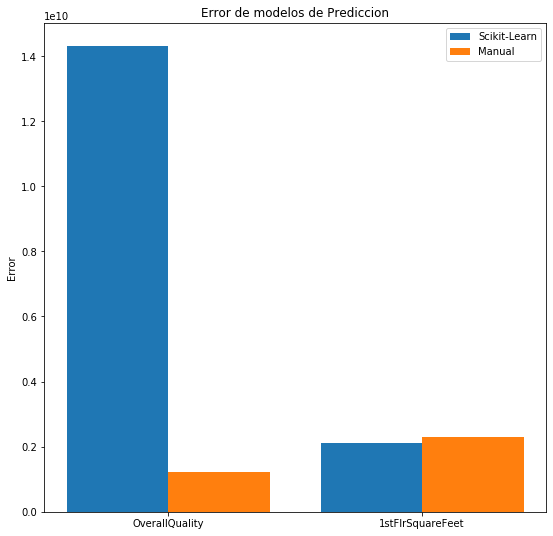

In [64]:
fnGraficaErrorModelosPrediccion(errorSK, errorMN)


# Conclusion 

Posterior al analisis de los datos sobre los precios de las casas y sus variables relacionadas, se seleccionaron dos variables con mayor correlación para la prediccion del valor de las casas las cuales son: 
* **Overall Quality**
* **1st. Floor Squeare Feet**

Para la creacion de los modelos de prediccion, se realizaron dos modelos con cada una de las varibales: **Modelo prediccion manual y Modelo prediccion Scikit-learn.**

**Variable - Overall Quality:** De acuerdo al analisis nos podemos dar cuenta que el **Modelo Manual** es mas eficiente por que tiene el menor error.

**Variable - 1st. Floor Square Feet:** De acuerdo al analisis nos podemos dar cuenta que el **Scikit-Learn** es mas eficiente por que tiene el menor error.

